# Frekvencijski spektar

U ovoj sveci biće sumirane osobine frekvencijskog spektra. Prvo ćemo se podsetiti pojmova kao što su frekvencijska rezolucija i maksimalna frekvencija, a potom ćemo upoznati fenomen curenja spektra i tehniku dopune nulama. 

In [1]:
import numpy as np
from numpy import fft 
from matplotlib import pyplot as plt
from matplotlib import patches

Pretpostavka na kojoj je znasnovana diskretna Furijeova transformacija je da je njen ulaz `jedan` period periodičnog signala. Na primer, ako je linearni signal `s` prikazan levim grafikom ulaz diskretne Furijeove transformacije, pretpostavka je da je signal periodičan i da njegov opšti oblik odgovara prikazu na desnom grafiku. 

Za dobijenje vizuelizacije korišćen je blok koda u kojem `t` predstavlja trenutke u kojima je uzorkovan signal `s`, a `N` broj uzoraka. Za nadovezivanje dela signala korišćena je bibliotečka funkcija `hstack`.

In [2]:
t = np.arange(0, 32)

In [3]:
N = len(t)

In [4]:
s = np.linspace(0, 1, N)

In [6]:
s_periodic = np.hstack([s]*4)

In [9]:
#s_periodic

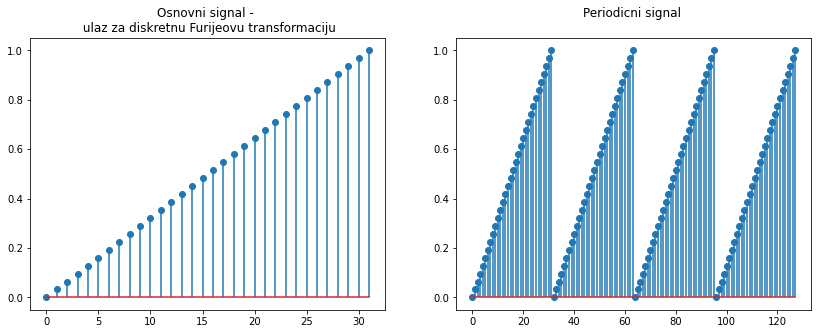

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.stem(t, s)
ax1.set_title('Osnovni signal - \n ulaz za diskretnu Furijeovu transformaciju')

ax2.stem(s_periodic)
ax2.set_title('Periodicni signal \n')

plt.show()

Ako je $N$ broj uzoraka signala koji su uzorkovani frekvencijom $F_s$, podsetimo se da su uzorci u vremenskom domenu na medjusobnom rastojanju $T_s=\frac{1}{F_s}$, a u frekvencijskom domenu na rastojanju $\Delta f = \frac{F_s}{N}$ tj. $\Delta f = \frac{1}{T}$ gde je $T = N \cdot T_s$ ukupno vreme trajanja signala. U tom smislu smo govorili o vremenskoj i frekvencijskoj rezoluciji. 

Ukoliko je reč o uzorkovanju signala sa kompleksnim vrednostima, najveća frekvencija koja je prisutna na frekvencijskoj skali je $F_{max} = \Delta f \cdot {N} = Fs$. Ukoliko je reč o uzorkovanju signala sa realnim vrednostima, frekvencijski spektar je simetričan i samo prvih $\frac{N}{2}$ podeoka nosi informacije o signalu. Zato je maksimalna frekvencija $F_{max} = \frac{Fs}{2}$ što je i u skladu sa Najkvistovom teoremom.

Uzimajući prethodno u obzir, podeoci na frekvencijskoj skali su određeni nizom vrednosti $0$, $\frac{Fs}{N}$, 2$\frac{Fs}{N}$,...,$k\frac{Fs}{N}$, ..., $(N−1)\frac{Fs}{N}$. Prva polovina ovog niza podeoka predstavlja `pozitivne` frekvencije, a druga, zbog simentričnosti spektra, `negativne` frekvencije. Umesto ovog zapisa može se koristiti i zapis frekvencija oblika od $-\frac{F_s}{2}$ do $\frac{F_s}{2}$ sa nultom frekvencijom u centru. 

Frekvencijsku skalu možemo manuelno generisati zadavanjem željenih granica funkciji `arange`. Možemo koristiti i bibliotečku funkciju `fftfreq`. Sa njom u vezi stoji i napomena o nešto drugačijem rasporedu frekvencija: nulta frekvencija je na početku generisane skale, za njom slede pozitivne frekvencije, a za njima i negativne frekvencije u inverznom poretku.

Da bismo ispratili različite načine zapisa podeoka skale, možemo posmatrati kosinusni signal $cos(2\pi\cdot20\cdot t)$ koji se uzorkuje frekvencijom 1000Hz. Možemo pretpostaviti da je uzorkovano 1000 vrednosti.

In [10]:
N = 1000
Fs = 1000
f0 = 20
t = np.arange(0, 1, 1/Fs)  
cos_t = np.cos(2*np.pi*f0*t)

Dalje možemo izračunati koeficijente Furijeove transformacije.

In [11]:
c = fft.fft(cos_t)

Prvi primer prikaza podrazumeva korišćenje frekvencijskog spektra sa rezolucijom $\frac{Fs}{N}$ i granicama $0$ i $F_s$ koji je manuelno konstruisan. 

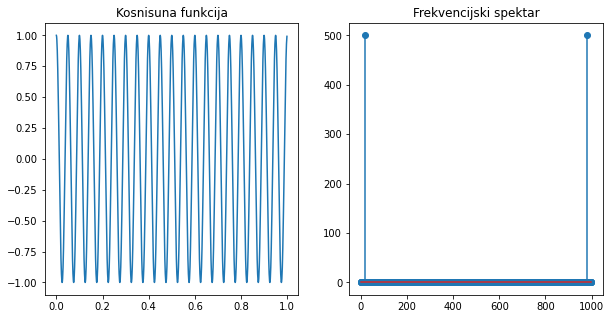

In [12]:

freq = np.arange(0, Fs, Fs/N)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(t, cos_t)
ax1.set_title('Kosnisuna funkcija')

ax2.stem(freq, abs(c))
ax2.set_title('Frekvencijski spektar')

plt.show()

Pošto poznajemo formu funkcije, frekvencije u frekvencijskom spektru možemo lako očitati: u pitanju su vrednosti 20 i 980. Drugoj vrednosti zbog simetričnosti spektra možemo pridružiti i interpretaciju frekvencije -20. 

Češće se prati simetrična osa frekvencijskog spektra tj. opseg od $-\frac{F_s}{2}$ do $\frac{F_s}{2}$ sa frekvencijskom rezolucijom $\frac{Fs}{N}$. Zato drugi primer ovo i demonstrira. Prilikom prikaza vrednosti koristićemo i bibliotečku funkciju `fftshift` koja preraspoređuje izračunate koeficijente tako da prate simetrični raspored frekvencija.

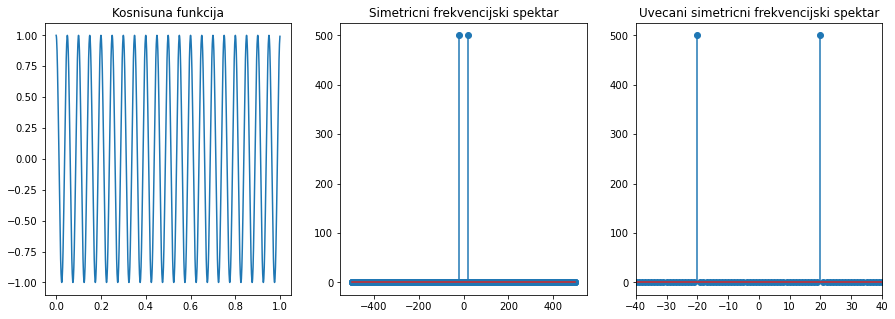

In [10]:
freq = np.arange(-Fs/2, Fs/2, Fs/N)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.plot(t, cos_t)
ax1.set_title('Kosnisuna funkcija')

ax2.stem(np.fft.fftshift(freq), abs(c))
ax2.set_title('Simetricni frekvencijski spektar')

ax3.stem(np.fft.fftshift(freq), abs(c))
ax3.set_title('Uvecani simetricni frekvencijski spektar')
ax3.set_xlim(-40, 40)

plt.show()

Sada jasno možemo očitati frekvencije -20 i 20. 

## Curenje spektra

Posmatrajmo sada kosinusni signal $cos(2\pi\cdot2\cdot t)$ koji se uzorkuje frekvencijom 50Hz u trajanju od 0.8 sekundi.

In [13]:
Fs = 50 
f0 = 2
T = 0.8 

t = np.arange(0, T, 1/Fs)  
N = len(t)

freq = np.arange(-Fs/2, Fs/2, Fs/N)  

cos_t = np.cos(2*np.pi*f0*t)  

Izračunajmo sada Furijeove koeficijente ovog signala.

In [14]:
c = np.fft.fft(cos_t)
c_shifted = np.fft.fftshift(c)

Zbog vizuelizacije, pratićemo kosinusni signal i sa nešto većim brojem uzorkovanih tačaka i u nešto dužem periodu.

In [15]:
t_fine = np.arange(0, T, 1/(100*Fs))
cos_tfine = np.cos(2*np.pi*f0*t_fine)
t_long = np.arange(-1, 2, 1/Fs) 

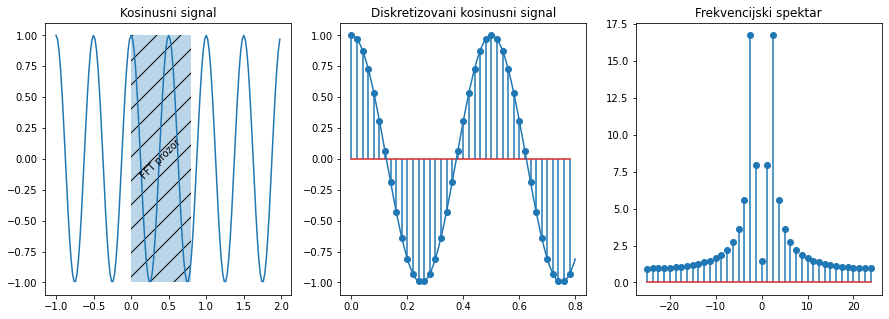

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.plot(t_long, np.cos(2*np.pi*f0*t_long))
ax1.add_patch(patches.Rectangle((0, -1), T, 2, hatch='/', alpha=0.3))
ax1.text(T/2, 0, "FFT prozor", ha='center', va='center', rotation=45)
ax1.set_title('Kosinusni signal')

ax2.stem(t, cos_t)
ax2.plot(t_fine, cos_tfine)
ax2.set_title('Diskretizovani kosinusni signal')

ax3.stem(freq, np.abs(c_shifted))
ax3.set_title('Frekvencijski spektar')

plt.show()

Pošto znamo da je frekvencija signala 2, očekivanja su da u frekvencijskom spektru imamo pikove u tačkama -2 i 2. Međutim, to nije slučaj jer frekvencijski spektar nema ove frekvencije. Zato dolazi do rasipanja (curenja) spektra na susedne frekvencije. 

Frekvencije prisutne u frekvencijskom spektru su: 

In [18]:
freq

array([-25.  , -23.75, -22.5 , -21.25, -20.  , -18.75, -17.5 , -16.25,
       -15.  , -13.75, -12.5 , -11.25, -10.  ,  -8.75,  -7.5 ,  -6.25,
        -5.  ,  -3.75,  -2.5 ,  -1.25,   0.  ,   1.25,   2.5 ,   3.75,
         5.  ,   6.25,   7.5 ,   8.75,  10.  ,  11.25,  12.5 ,  13.75,
        15.  ,  16.25,  17.5 ,  18.75,  20.  ,  21.25,  22.5 ,  23.75])

U opštem slučaju ovo je otežavajuća okolnost jer se prisutne frekvencije ne mogu lepo očitati.

Podsetimo se da diskretna Furijeova transformacija podrazumeva da je ulaz jedan period periodičnog signala. Ako nacrtamo signal iz primera, videćemo da ovo nije baš polazni kosinusni signal i da imamo nagle prelaze sa kraja ka početku novog perioda. Razlog ovome je što nismo merili signal dovoljno dugo da može da se pokrije pravi period. 

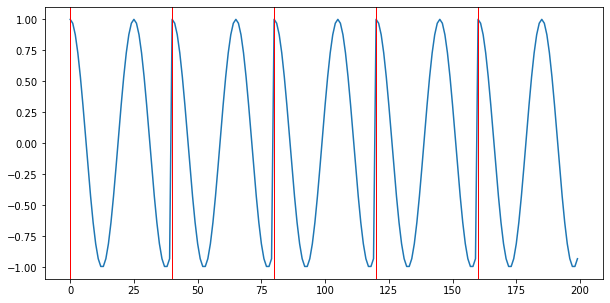

In [19]:
signal_assumed = np.hstack([cos_t]*5)
plt.figure(figsize=(10, 5))
plt.plot(signal_assumed)
# iscrtavamo vertikalne linije koje prate krajeve perioda
for n in range(5):
    plt.axvline(n*N, lw=1, color='red')

Ukoliko signal merimo dovoljno dugo, na primer, 1 sekundu, tako da obuhvati ceo broj perioda, frekvencijski spektar će imati formu koju očekujemo.

In [20]:
T = 1
N = Fs*T
t = np.arange(0,T,1/Fs)
cos_t = np.cos(2*np.pi*f0*t)

In [21]:
c = np.fft.fft(cos_t)
c_shifted = np.fft.fftshift(c)

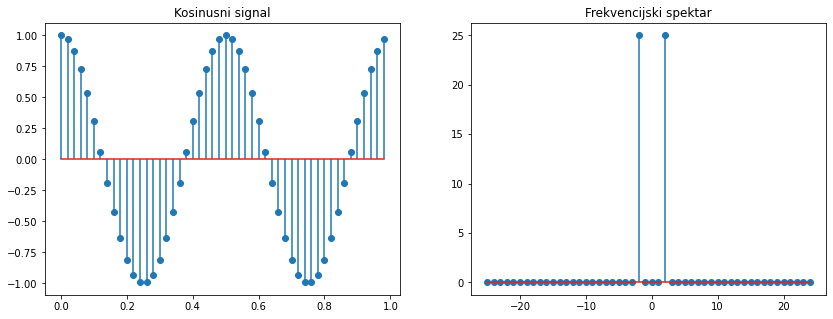

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

ax1.stem(t, cos_t)
ax1.set_title('Kosinusni signal')

freq = np.arange(-Fs/2, Fs/2, Fs/N)
ax2.stem(freq, np.abs(c_shifted))
ax2.set_title('Frekvencijski spektar')

plt.show()

## Dopuna nulama (engl. zero-padding)

U prethodnoj sekciji smo videli da ako ako pratimo signal koji nije ceo umnožak osnovnog perioda imamo problem sa curenjem spektra i detektovanjem prave frekvencije u frekvencijskom spektru.

Pogledajmo šta će se dogoditi ako u prethodnom primeru uzorkovani signal dopunimo određenim brojem nula.

In [23]:
Fs = 50 
f0 = 2
T = 0.8 
t = np.arange(0, T, 1/Fs)  
N = len(t)

Prvo ćemo odrediti Furijeove koeficijente koristeći prave vrednosti uzorkovanog signala. 

In [24]:
cos_t = np.cos(2*np.pi*f0*t) 
freq = np.arange(-Fs/2, Fs/2, Fs/N)  
c = fft.fft(cos_t)
c_shifted = fft.fftshift(c)

Potom ćemo odrediti Furijeove koeficijente signala koji se dobija nadovezivanjem nula na vrednosti uzorkovanog signala. U našem slučaju broj nula će biti sedam puta veći od dužine uzorkovanog signala.

In [25]:
padding = 7*N
cos_t_zero_padded = np.hstack([cos_t, np.zeros(padding)])
N_zero_padded = len(cos_t_zero_padded)
freq_zero_padded = np.arange(-Fs/2, Fs/2, Fs/N_zero_padded)
c_zero_padded = fft.fft(cos_t_zero_padded)
c_zero_padded_shifted = fft.fftshift(c_zero_padded)

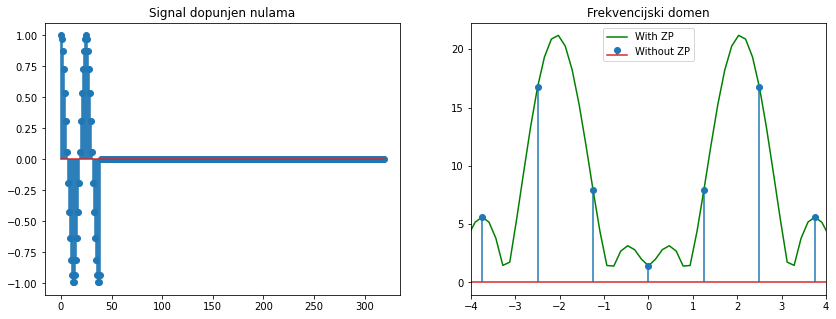

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.stem(cos_t_zero_padded)
ax1.set_title('Signal dopunjen nulama')

ax2.plot(freq_zero_padded, np.abs(c_zero_padded_shifted), 'g-', label='With ZP')
ax2.stem(freq, np.abs(c_shifted), label='Without ZP')
ax2.set_xlim(-4, 4)
ax2.set_title('Frekvencijski domen')

plt.legend(loc='best')
plt.show()

Kao što možemo videti, dodavanjem nula uzorkovanom signalu je učinilo da u frekvencijskom spektru imamo finiju frekvencijsku osu sa razmakom između frekvencija $\frac{Fs}{8N}$ umesto $\frac{Fs}{N}$. Dobijena zelena kriva koja odgovara dopunjenom signalu interpolira ređu raspodelu tačaka prethodne transformacije prikazane na slici plavom bojom. Zahvaljujući tome na osnovu najvećih vrednosti dopunjenog signala možemo očitati pravu frekvenciju signala tj. vrednosti -2 i 2. 

Tehnika dopune nulama ne može uvek da nam pomogne u očitavanju frekvencija. Na primer, njome ne možemo postići razlikovanje dveju bliskih frekvencija u frekvencijskom spektru. Uverimo se u to primerom signala oblika $cos(2\pi f_0 t)+cos(2\pi f_1 t)$ za $f_0=2$ i $f_1=2.3$. Možemo pretpostaviti da se signal uzorkuje frekvencijom 50Hz u trajanju od jedne sekunde.

In [28]:
Fs = 50
T = 1

In [29]:
f0 = 2
f1 = 2.3
t = np.arange(0, T, 1/Fs)
N = len(t)
signal = lambda t: np.cos(2*np.pi*f0*t) + np.cos(2*np.pi*f1*t)

In [30]:
freq = np.arange(-Fs/2, Fs/2, Fs/N)
c = fft.fft(signal(t))
c_shifted = fft.fftshift(c)

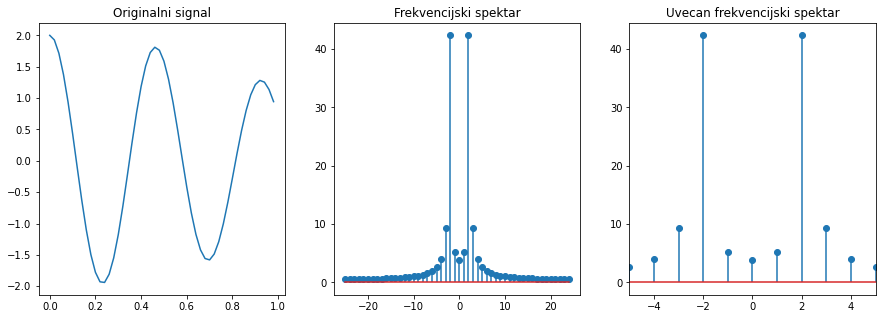

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.plot(t, signal(t))
ax1.set_title('Originalni signal')

ax2.stem(freq, np.abs(c_shifted))
ax2.set_title('Frekvencijski spektar')

ax3.stem(freq, np.abs(c_shifted))
ax3.set_title('Uvecan frekvencijski spektar')
ax3.set_xlim(-5, 5)

plt.show()

Ako pogledamo frekvencijski spektar ovog signala, jasno se identifikuje samo frekvencija $f_0=2$. Možemo proveriti kako će se ponašati signal dopunjen nulama.

In [32]:
padding = 31*N
cos_t_zero_padded = np.hstack([signal(t), np.zeros(padding)])
N_zero_padded = len(cos_t_zero_padded)
freq_zero_padded = np.arange(-Fs/2, Fs/2, Fs/N_zero_padded)
c_zero_padded = fft.fft(cos_t_zero_padded)
c_zero_padded_shifted = fft.fftshift(c_zero_padded)

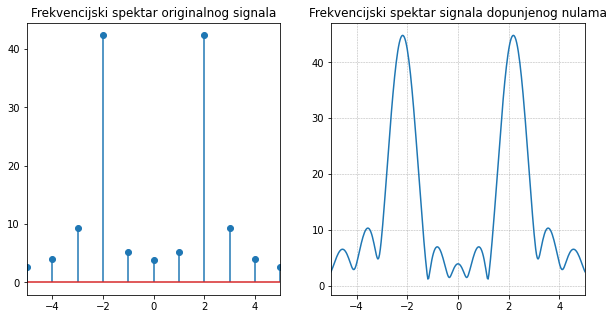

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.stem(freq, np.abs(c_shifted))
ax1.set_title('Frekvencijski spektar originalnog signala')
ax1.set_xlim(-5, 5)

ax2.plot(freq_zero_padded, np.abs(c_zero_padded_shifted))
ax2.set_title('Frekvencijski spektar signala dopunjenog nulama')
ax2.grid(linestyle = '--', linewidth = 0.5)
ax2.set_xlim(-5, 5)

plt.show()

Zaključak koji bi se mogao izvesti je da u signalu postoji frekvencija čija je vrednost $f=2.2$ što u našem slučaju nije tačno. Ovim i potvrđujemo da dopuna signala nulama ne obogaćuje sam spektar već omogućava da se vrednosti koje se nalaze u njemu finije interpoliraju. 

Baš kao i u prethodnom slučaju, praćenje signala duži vremenski period dozvoljava tačno izdvajanje frekvencija.

In [34]:
T = 10

In [35]:
t = np.arange(0, T, 1/Fs)
N = len(t)

In [36]:
freq = np.arange(-Fs/2, Fs/2, Fs/N)
c = fft.fft(signal(t))
c_shifted = fft.fftshift(c)

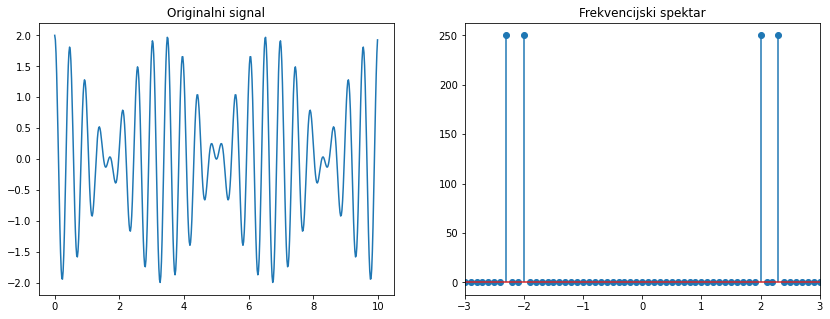

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(t, signal(t))
ax1.set_title('Originalni signal')

ax2.stem(freq, np.abs(c_shifted))
ax2.set_title('Frekvencijski spektar')
ax2.set_xlim(-3, 3)

plt.show()